## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [82]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [83]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [84]:
df.shape[0]  # or len(df)

69889

`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [85]:
df['converted'].mean()

np.float64(0.13047832992316388)

`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [86]:
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [87]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts
# Get the count of visitors from each country
country_counts = df['country'].value_counts()
print("Number of visitors from each country:")
print(country_counts)

Number of visitors from each country:
country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64


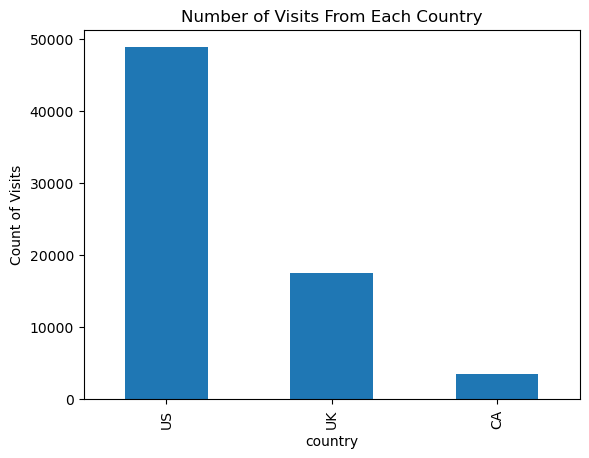

In [88]:
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [52]:
df.info()

print("\nColumn data types:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB

Column data types:
country      object
group        object
converted     int64
dtype: object


The last column 'converted' is not categorical.

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

In [53]:
print("Possible values in 'converted' column:")
print(df['converted'].unique())

print("\nDistribution of values:")
print(df['converted'].value_counts())

Possible values in 'converted' column:
[0 1]

Distribution of values:
converted
0    60770
1     9119
Name: count, dtype: int64


Yes, it makes perfect sense that 0 and 1 are the only possible values in the converted column because:

1. **Binary Outcome**: In an A/B test for conversion, we're tracking a binary event - either a user converted (1) or they didn't (0). There's no in-between state.
2. **Standard Practice**: Using binary encoding (0/1) is a standard practice in data analysis for:

    - Easy statistical analysis
    - Clear interpretation
    - Efficient storage
    - Compatible with most machine learning algorithms

3. **Business Logic**: From a business perspective, a user either:

    - Completed the desired action (conversion = 1)
    - Did not complete the desired action (conversion = 0)

Any other values would not make logical sense in this context, as we can't have partial conversions or multiple conversions per row in this dataset structure.

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [89]:
overall_conversion_prob = df['converted'].mean()

print(f"The probability of conversion (regardless of page or country) is: {overall_conversion_prob:.4f}")
print(f"This means there is a {overall_conversion_prob*100:.2f}% chance of conversion")

The probability of conversion (regardless of page or country) is: 0.1305
This means there is a 13.05% chance of conversion


`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [90]:
df.query('group == "control"')['converted'].mean()

np.float64(0.1052540515600669)

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [91]:
df.query('group == "treatment"')['converted'].mean()

np.float64(0.15532078043793132)

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

Yes, treatment group has a higher conversion rate **0.1553** compare to the **0.1052** in the control group

`e)` What is the probability that an individual was in the `treatment`?

In [92]:
prob_treatment = len(df[df['group'] == 'treatment']) / len(df)

print(f"The probability of being in the treatment group is: {prob_treatment:.4f}")
print(f"This means {prob_treatment*100:.2f}% of users were in the treatment group")

print("\nDistribution of users in each group:")
print(df['group'].value_counts(normalize=True))

The probability of being in the treatment group is: 0.5038
This means 50.38% of users were in the treatment group

Distribution of users in each group:
group
treatment    0.503813
control      0.496187
Name: proportion, dtype: float64


`f)` What is the probability that an individual was from Canada `CA`?

In [93]:
prob_canada = len(df[df['country'] == 'CA']) / len(df)

print(f"The probability of being from Canada is: {prob_canada:.4f}")
print(f"This means {prob_canada*100:.2f}% of users were from Canada")

print("\nDistribution of users across all countries:")
print(df['country'].value_counts(normalize=True))

The probability of being from Canada is: 0.0499
This means 4.99% of users were from Canada

Distribution of users across all countries:
country
US    0.698966
UK    0.251127
CA    0.049908
Name: proportion, dtype: float64


`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [94]:
df.query('country == "US"')['converted'].mean()

np.float64(0.13277379733879222)

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [95]:
df.query('country == "UK"')['converted'].mean()

np.float64(0.12512107572218106)

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

Yes, the conversion rates for US is **slightly higher** than the UK

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [61]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [62]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.16%          |  9.45%          |
| Treatment   | 15.8%       |  14.87%          |  15.40%          |

In [96]:
uk_conversion = df.query('country == "UK"').groupby('group')['converted'].mean() * 100

print("UK conversion rates by group (%):")
print(f"control:    {uk_conversion['control']:.2f}%")
print(f"treatment:  {uk_conversion['treatment']:.2f}%")
print("\n")

ca_conversion = df.query('country == "CA"').groupby('group')['converted'].mean() * 100

print("CA conversion rates by group (%):")
print(f"control:    {ca_conversion['control']:.2f}%")
print(f"treatment:  {ca_conversion['treatment']:.2f}%")

UK conversion rates by group (%):
control:    10.16%
treatment:  14.87%


CA conversion rates by group (%):
control:    9.45%
treatment:  15.40%


<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [64]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [65]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate treatment group conversions
treatment_converted = np.random.choice([0, 1], 
                                     size=n_treatment, 
                                     p=[1-p_control_treatment_null, p_control_treatment_null])

# Show first 10 values
print("First 10 simulated treatment conversion results:")
print(treatment_converted[:10])

# Show summary statistics
print("\nSummary of simulated treatment conversions:")
print(f"Number of simulated conversions: {sum(treatment_converted)}")
print(f"Simulated conversion rate: {np.mean(treatment_converted):.4f}")
print(f"Total number of trials: {len(treatment_converted)}")

First 10 simulated treatment conversion results:
[0 1 0 0 0 0 0 0 0 0]

Summary of simulated treatment conversions:
Number of simulated conversions: 4569
Simulated conversion rate: 0.1298
Total number of trials: 35211


`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [67]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate control group conversions
control_converted = np.random.choice([0, 1], 
                                   size=n_control, 
                                   p=[1-p_control_treatment_null, p_control_treatment_null])

# Show first 10 values
print("First 10 simulated control conversion results:")
print(control_converted[:10])

# Show summary statistics
print("\nSummary of simulated control conversions:")
print(f"Number of simulated conversions: {sum(control_converted)}")
print(f"Simulated conversion rate: {np.mean(control_converted):.4f}")
print(f"Total number of trials: {len(control_converted)}")

First 10 simulated control conversion results:
[0 1 0 0 0 0 0 0 0 0]

Summary of simulated control conversions:
Number of simulated conversions: 4508
Simulated conversion rate: 0.1300
Total number of trials: 34678


`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [68]:
# Calculate conversion rates for each group
p_treatment_sim = np.mean(treatment_converted)
p_control_sim = np.mean(control_converted)

# Calculate the difference (treatment - control)
p_diff = p_treatment_sim - p_control_sim

print(f"Simulated treatment conversion rate: {p_treatment_sim:.4f}")
print(f"Simulated control conversion rate: {p_control_sim:.4f}")
print(f"Difference (p_treatment - p_control): {p_diff:.4f}")

Simulated treatment conversion rate: 0.1298
Simulated control conversion rate: 0.1300
Difference (p_treatment - p_control): -0.0002


`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [69]:
np.random.seed(42)

# Initialize empty array for storing differences
p_diffs = []

# Run 500 simulations
for _ in range(500):
    # Simulate treatment group
    treatment_converted = np.random.choice([0, 1], 
                                         size=n_treatment, 
                                         p=[1-p_control_treatment_null, p_control_treatment_null])
    
    # Simulate control group
    control_converted = np.random.choice([0, 1], 
                                       size=n_control, 
                                       p=[1-p_control_treatment_null, p_control_treatment_null])
    
    # Calculate and store difference in conversion rates
    p_diff = np.mean(treatment_converted) - np.mean(control_converted)
    p_diffs.append(p_diff)

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

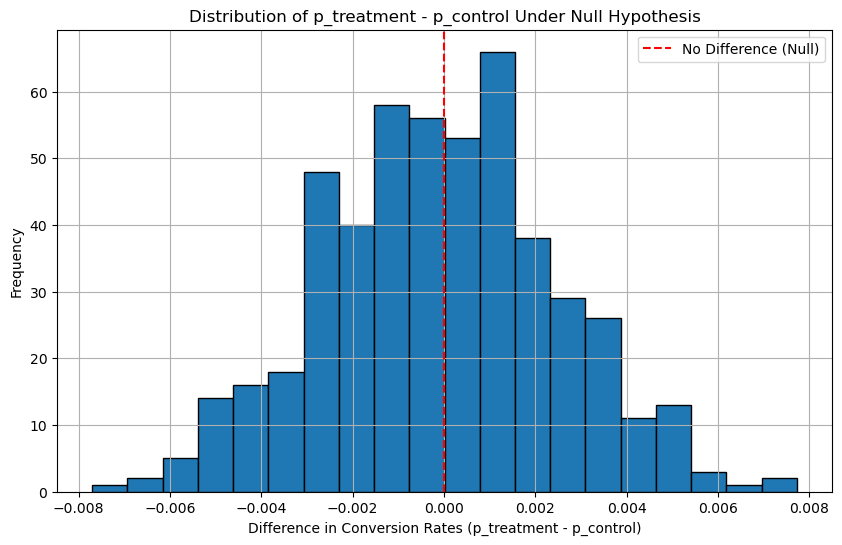


Summary Statistics of Differences:
Mean: -0.0001
Standard Deviation: 0.0026


In [70]:
# Convert p_diffs to pandas Series
p_diffs = pd.Series(p_diffs)

# Create histogram with more formatting
plt.figure(figsize=(10, 6))
p_diffs.hist(bins=20, edgecolor='black')
plt.title('Distribution of p_treatment - p_control Under Null Hypothesis')
plt.xlabel('Difference in Conversion Rates (p_treatment - p_control)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='No Difference (Null)')
plt.legend()
plt.show()

# Print summary statistics
print("\nSummary Statistics of Differences:")
print(f"Mean: {p_diffs.mean():.4f}")
print(f"Standard Deviation: {p_diffs.std():.4f}")

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [71]:
# Calculate the actual difference observed in the original data
treatment_mean = df.query('group == "treatment"')['converted'].mean()
control_mean = df.query('group == "control"')['converted'].mean()
obs_diff = treatment_mean - control_mean

# Calculate proportion of simulated differences greater than observed difference
prop_greater = (p_diffs > obs_diff).mean()

# Detailed debugging information
print("Detailed Analysis:")
print(f"Treatment group conversion rate: {treatment_mean:.4f}")
print(f"Control group conversion rate: {control_mean:.4f}")
print(f"Observed difference (treatment - control): {obs_diff:.4f}")
print("\nSimulation Summary:")
print(f"Mean of simulated differences: {p_diffs.mean():.4f}")
print(f"Min simulated difference: {p_diffs.min():.4f}")
print(f"Max simulated difference: {p_diffs.max():.4f}")
print(f"Number of simulated differences > observed: {(p_diffs > obs_diff).sum()}")
print(f"Total number of simulations: {len(p_diffs)}")
print(f"\nP-value (proportion > observed diff): {prop_greater:.4f}")

Detailed Analysis:
Treatment group conversion rate: 0.1553
Control group conversion rate: 0.1053
Observed difference (treatment - control): 0.0501

Simulation Summary:
Mean of simulated differences: -0.0001
Min simulated difference: -0.0077
Max simulated difference: 0.0077
Number of simulated differences > observed: 0
Total number of simulations: 500

P-value (proportion > observed diff): 0.0000


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

**Answer**

The value we computed in part (g) is called the p-value, which is a fundamental concept in statistical hypothesis testing. Here's what it means:

1. **Definition**: The p-value represents the probability of observing a difference as extreme as (or more extreme than) what we actually observed in our data, assuming the null hypothesis is true (that there's no real difference between the pages).

2. **Interpretation**:

    - If the p-value is less than our significance level (0.05), we would reject the null hypothesis and conclude there is evidence of a difference between the pages.
    - If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning we don't have sufficient evidence to conclude that the new page is better than the old page.

3. **In this context**:
    - We're testing whether the new page leads to better conversion rates than the old page
    - Our Type I error rate of 0.05 means we're willing to accept a 5% chance of incorrectly concluding there's a difference when there actually isn't one
    - The p-value helps us make this decision based on statistical evidence rather than chance

This is a crucial metric in A/B testing and scientific studies as it helps quantify the strength of evidence against the null hypothesis and guides decision-making about whether to implement changes.



<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

Since we're dealing with a binary outcome variable (conversion: yes=1 or no=0), we should use Logistic Regression. This is the appropriate choice because:

1. **Binary Outcome**: The dependent variable (converted) has only two possible values (0 or 1)
2. **Probability Prediction**: Logistic regression models the probability of success (conversion in this case)
3. **Non-linear Relationship**: It uses a logistic function to model the non-linear relationship between the independent variables and the binary outcome
4. **Bounded Output**: The predictions are bounded between 0 and 1, which is appropriate for probability estimation

Logistic regression is particularly well-suited for A/B testing scenarios where we're trying to predict the probability of a conversion based on which page version (treatment or control) a user sees.

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [72]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,False
1,US,treatment,1,1,True
2,UK,treatment,0,1,True
3,UK,control,0,1,False
4,UK,treatment,0,1,True


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [73]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [74]:
import statsmodels.api as sm
import numpy as np

y_array = np.asarray(y, dtype=np.float64)
X_array = np.asarray(X, dtype=np.float64)

print(f"Shape of X: {X_array.shape}")
print(f"Shape of y: {y_array.shape}")

logit_mod = sm.Logit(y_array, X_array)
logit_res = logit_mod.fit()

Shape of X: (69889, 2)
Shape of y: (69889,)
Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [75]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                0.007175
Time:                        18:24:13   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1402      0.017   -122.305      0.000      -2.174      -2.106
x1             0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

**Answer**


## P-value from Logistic Regression
The p-value associated with ab_page (represented by x1 in the logistic regression results) is 0.000. This indicates a statistically significant effect of the ab_page on conversion rates, suggesting that the treatment page has a significant impact compared to the control page.

## Experimentation Section Analysis

### 1. Simulated Conversion Rates
* Simulated treatment conversion rate: 0.1298
* Simulated control conversion rate: 0.1300
* Observed difference: -0.0002, which is very close to zero, indicating no practical difference between the treatment and control groups in the simulation.

### 2. Observed Data
* Treatment group conversion rate: 0.1553
* Control group conversion rate: 0.1053
* Observed difference: 0.0501, indicating a notable difference in conversion rates in the actual data.

### 3. Simulation Results
* Mean of simulated differences: -0.0001
* P-value from simulations: 0.0000, indicating that none of the simulated differences were greater than the observed difference.

## Conclusion
* **Statistical Significance**: Both the logistic regression and the simulation results suggest statistical significance. The regression shows a significant p-value for ab_page, and the simulation p-value is 0.0000, indicating that the observed difference is unlikely under the null hypothesis.

* **Practical Implications**: While the logistic regression indicates statistical significance, the simulated data shows almost no difference between treatment and control groups, suggesting that the practical significance might be limited.

* **Consistency with Experimentation**: The logistic regression results align with the observed data from the experimentation section, showing a significant difference in conversion rates. However, the simulation suggests that this difference might not be practically significant.

In summary, the logistic regression and observed data suggest a significant effect of the treatment, but the simulation indicates this effect might not be practically meaningful. This highlights the importance of considering both statistical and practical significance in A/B testing.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [76]:
import pandas as pd

df = df.reset_index(drop=True)

country_dummies = pd.get_dummies(df['country'])
df['US'] = country_dummies['US']
df['UK'] = country_dummies['UK']

df['US'] = df['US'].astype(int)
df['UK'] = df['UK'].astype(int)

print(df.head())


  country      group  converted  intercept  ab_page  US  UK
0      UK    control          0          1    False   0   1
1      US  treatment          1          1     True   1   0
2      UK  treatment          0          1     True   0   1
3      UK    control          0          1    False   0   1
4      UK  treatment          0          1     True   0   1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [77]:
# Define the response variable y
y = df['converted']

# Define the feature matrix X
# Include intercept, ab_page, US, and UK
X = df[['intercept', 'ab_page', 'US', 'UK']]

# Display the first few rows of X and y to verify
print("X matrix:")
print(X.head())
print("\ny response:")
print(y.head())

X matrix:
   intercept  ab_page  US  UK
0          1    False   0   1
1          1     True   1   0
2          1     True   0   1
3          1    False   0   1
4          1     True   0   1

y response:
0    0
1    1
2    0
3    0
4    0
Name: converted, dtype: int64


`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [79]:
import statsmodels.api as sm
import numpy as np

# Convert y and X to numpy arrays with float64 type
y_array = np.asarray(y, dtype=np.float64)
X_array = np.asarray(X, dtype=np.float64)

# Print the shapes of X and y to verify
print(f"Shape of X: {X_array.shape}")
print(f"Shape of y: {y_array.shape}")

# Fit the logistic regression model
logit_mod = sm.Logit(y_array, X_array)
logit_res = logit_mod.fit()

# Print the summary of the model
print(logit_res.summary())

Shape of X: (69889, 4)
Shape of y: (69889,)
Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                0.007312
Time:                        18:27:05   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1930      0.053    -41.308      0.000      -2.2

`d)` Provide the summary of your model below.

# Logistic Regression Model Summary

## Model Overview
* **Dependent Variable (`y`)**: The binary outcome variable indicating conversion.
* **Number of Observations**: 69,889.
* **Model**: Logistic regression using Maximum Likelihood Estimation (MLE).
* **Pseudo R-squared**: 0.007312, indicating a low proportion of variance explained by the model.
* **Log-Likelihood**: -26,870, a measure of model fit.
* **LL-Null**: -27,068, the log-likelihood of the null model.
* **LLR p-value**: 1.778e-85, indicating the overall significance of the model.

## Coefficients

### Intercept (`const`):
* Coefficient: -2.1930
* Standard Error: 0.053
* z-value: -41.308
* p-value: 0.000
* 95% Confidence Interval: [-2.297, -2.089]
* Interpretation: The intercept is statistically significant, indicating the baseline log-odds of conversion when all predictors are zero.

### `x1` (likely `ab_page`):
* Coefficient: 0.4466
* Standard Error: 0.023
* z-value: 19.534
* p-value: 0.000
* 95% Confidence Interval: [0.402, 0.491]
* Interpretation: This coefficient is statistically significant, suggesting that the treatment page (`ab_page`) has a significant effect on conversion rates.

### `x2` (likely `US`):
* Coefficient: 0.0727
* Standard Error: 0.053
* z-value: 1.372
* p-value: 0.170
* 95% Confidence Interval: [-0.031, 0.177]
* Interpretation: This coefficient is not statistically significant, indicating no strong evidence of a difference in conversion rates for the US compared to the baseline (CA).

### `x3` (likely `UK`):
* Coefficient: 0.0067
* Standard Error: 0.056
* z-value: 0.120
* p-value: 0.905
* 95% Confidence Interval: [-0.103, 0.117]
* Interpretation: This coefficient is not statistically significant, indicating no strong evidence of a difference in conversion rates for the UK compared to the baseline (CA).

## Conclusion
* The model suggests that the treatment page (`ab_page`) significantly affects conversion rates, while the country variables (`US` and `UK`) do not show significant effects compared to the baseline (`CA`).
* The low Pseudo R-squared value indicates that the model explains only a small portion of the variance in conversion rates.

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**Answer**

# Analysis of Country Effects on Conversion Rates

## P-values Interpretation

### US (`x2`):
* **P-value**: 0.170
* **Interpretation**: The p-value for the `US` variable is greater than the common significance level of 0.05. This suggests that there is no statistically significant evidence to conclude that being from the US has an impact on the conversion rate compared to the baseline category (CA).

### UK (`x3`):
* **P-value**: 0.905
* **Interpretation**: The p-value for the `UK` variable is much greater than 0.05, indicating that there is no statistically significant evidence to suggest that being from the UK affects the conversion rate compared to the baseline category (CA).

## Conclusion
* Both the `US` and `UK` variables do not show statistically significant effects on conversion rates. This means that, according to your model, the likelihood of conversion is not significantly different for users from the US or UK compared to those from CA.
* These findings suggest that the differences in conversion rates between these countries are not strong enough to be considered statistically significant in this context.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission

Please follow the directions in the classroom to submit this notebook, as well as your completed slides.

In [80]:
#Convert to HTML
!jupyter nbconvert --to html ab_test_results.ipynb

[NbConvertApp] Converting notebook ab_test_results.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 471117 bytes to ab_test_results.html


In [81]:
#Convert to PDF
!jupyter nbconvert --to pdf ab_test_results.ipynb

[NbConvertApp] Converting notebook ab_test_results.ipynb to pdf
[NbConvertApp] Support files will be in ab_test_results_files/
[NbConvertApp] Making directory ./ab_test_results_files
[NbConvertApp] Writing 99569 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 161853 bytes to ab_test_results.pdf
